In [3]:
from IPython.core.display import HTML
css_file = './stylesheets/custom.css'
HTML(open(css_file, "r").read())

<h1 align="center">Introduction to</h1>
<h1 align="center">NumPy &amp; Scipy:</h1>
<h1 align="center">the core numerical scientific packages</h1>

<p><br style="clear: both;"/></p><p><br style="clear: both;"/></p><p><br style="clear: both;"/></p>

<div style="color:#5f5c48">
This tutorial is prepared by ACM/SIAM Student Chapter of King Abdullah University of Science and Technology (KAUST).
<br/>
This notebook has been adapted from the following tutorials:
<ul>
<li> KAUST ACM/SIAM Student Chapter's [2017 tutorial](https://acm-siam-kaust-chapter.github.io/python_tutorial_2017/)
<li>David Ketcheson's [Introduction to NumPy and Matplotlib](http://nbviewer.ipython.org/github/ketch/AMCS252/blob/master/2_Introduction_to_Numpy%20and_Matplotlib.ipynb)</li>
<li>Software Carpentry's [Numerical analysis with NumPy](http://nbviewer.ipython.org/github/geocarpentry/2014-01-30-mit/blob/gh-pages/lessons/vignettes/Numerical%20analysis%20with%20NumPy.ipynb)</li>
<li>J.R. Johansson's [Numpy - multidimensional data arrays](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-2-Numpy.ipynb) and [SciPy - Library of scientific algorithms for Python](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-3-Scipy.ipynb#SciPy---Library-of-scientific-algorithms-for-Python)</li>
<li>Official [Tentative NumPy tutorial](http://www.scipy.org/Tentative_NumPy_Tutorial)</li>
</ul>
<br/>

Presented on February 23, 2018 at Budapest University of Technology and Economics, Hungary.
<br/><br/>
</div>

## NumPy

Python includes a package for numerical computation called numpy, which is an essential tool for scientific computing. 
It is based on multidimensional arrays (vectors and matrices) and provides a large library of functions and operators that work efficiently on these objects.
In this way, any numerical algorithm is expressed as operations on arrays and in many cases runs almost as quickly as the equivalent C code.

`Numpy` serves as a foundation library that makes Python a competitor to MATLAB for scientific computing.

`NumPy` is used in: 
Numerical Analysis, Linear algebra, Solution of differential equations, Statistical analysis and many more...


### Why to use NumPy?

Consider the following list and suppose we want to perform some simple algebraic operations:

In [4]:
price = [5.99, 10.25, 2.0, 40.99, 5.60, 63.49]

In [5]:
price*2

[5.99, 10.25, 2.0, 40.99, 5.6, 63.49, 5.99, 10.25, 2.0, 40.99, 5.6, 63.49]

In [6]:
price+0.5

TypeError: can only concatenate list (not "float") to list

Clearly, if we wanted to double the value of each element and add half, this cannot be done easily. Instead, we would have to use a loop:

In [10]:
for i in range(len(price)):
    price[i] = price[i]*2
    price[i] = price[i]+0.5
print(price)

[12.48, 21.0, 4.5, 82.48, 11.7, 127.48]


However, it is slow (first) and requires too much code (second). It can be done more efficient using `NumPy`.

### Getting started

We start, by importing the NumPy module. Import statements like this are the typical way of getting access to functions in Python. The most general way to import a module is the following:

In [11]:
import numpy as np

First example: compute $\sin (3\pi/2)$:

In [12]:
np.sin(3*np.pi/2)

-1.0

Second example: compute $e + \pi$:

In [13]:
np.exp(1) + np.pi

5.8598744820488378

### Arrays

In above examples we compute scalars.
What makes NumPy brilliant is that it allows you make computations on multidimensional quantities (such as vectors and matrices) using thing called `ndarray` ($N$-dimensional array).
Computer scientists call such a thing a *data structure*.
We will consider only one-dimensional (vectors) and two-dimensional (matrices) arrays in this tutorial.

Let's create a 1D array $p$ as we did before and compute $2p + 0.5$:

In [14]:
price = np.array([1, 2, 3, 4, 5])
type(price)

numpy.ndarray

In [15]:
price = price*2+0.5
price

array([  2.5,   4.5,   6.5,   8.5,  10.5])

There are other ways to create one-dimensional arrays:

Function `linspace` has three arguments: the value of the left point, the value of the right point and the number of points in total:

In [16]:
x = np.linspace(0, 1, num=5)
x

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

Another function, `arange` is very similar but it takes a step between points as the third argument:

In [17]:
y = np.arange(0, 1, 0.25)
y

array([ 0.  ,  0.25,  0.5 ,  0.75])

Notice, that `arange` does not include the right point in the result!

Other functions that can be used to create an array:

In [18]:
x = np.zeros(5)
y = np.ones(3)
print(x, '\n', y)

[ 0.  0.  0.  0.  0.] 
 [ 1.  1.  1.]


Now let's compute $\sin 2\pi x$ and see its graph:

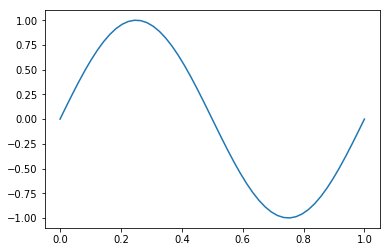

In [19]:
x = np.linspace(0, 1, num=50)
y = np.sin(2*np.pi*x)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(x, y, '-')

---
### Exercise 1

Change the inputs of the *linspace* and *arange* function until you understand exactly what they do. Using both ways, create a vector of starting from -1.5 to 4.5 inclusive with a step of 0.5. 

In [20]:
# type your solution here

##### Solution

In [ ]:
# %load solutions/session2/1D_array.py
x = np.linspace(-1.5,4.5,13)
y = np.arange(-1.5,5,0.5)
print (x)
print (y)


We can always find out what a function does by typing its name, followed by a question mark:

In [22]:
np.arange?

Resize the help window (to get it out of your way) by dragging the divider. Double click on the divider to close it.

### Multidimensional arrays

We can create multidimensional arrays, like the following:

In [23]:
A = np.array([
    [1, 2.4, -13],
    [4.1, 5, 0],
    [7.2, 8, 9]
])
print("A = \n", A)
print(A.shape)

A = 
 [[  1.    2.4 -13. ]
 [  4.1   5.    0. ]
 [  7.2   8.    9. ]]
(3, 3)


To see all different attributes of the array object type its name followed by a fullstop and press *tap*. Note that some attributes are basically functions and require parentheses (with or without arguments), e.g. *transpose* and others don't, e.g. *ndim*:

In [24]:
print(A.transpose())
print(A.ndim)

[[  1.    4.1   7.2]
 [  2.4   5.    8. ]
 [-13.    0.    9. ]]
2


We can also define the shape of the array:

In [25]:
np.random.uniform(0, 1, size=(5,5)) # 5 x 5 matrix with elements from a uniform distribution

array([[ 0.07088403,  0.16668336,  0.68382221,  0.91182089,  0.92801007],
       [ 0.51041845,  0.94469174,  0.44252892,  0.76186282,  0.71560897],
       [ 0.69060474,  0.30993724,  0.07454488,  0.12725523,  0.08252836],
       [ 0.6061654 ,  0.08627988,  0.87318259,  0.83418225,  0.7272371 ],
       [ 0.54558569,  0.46494941,  0.57568448,  0.5266687 ,  0.50135459]])

#### Other ways to create matrices

We can use functions `zeros` and `ones` (that we used before) to create matrices.
Also we can use function `eye` to create an identity matrix and function `diag` to create a diagonal matrix:

In [26]:
print(np.zeros((3,4)))
print('\n')
print(np.ones((2,3)))
print('\n')
print(np.eye(3))
print('\n')
print(np.diag([1, 2, 3]))

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


[[ 1.  1.  1.]
 [ 1.  1.  1.]]


[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


[[1 0 0]
 [0 2 0]
 [0 0 3]]


Notice how many parentheses we should use: to construct zero matrix of size $2\times3$, we should pass the size as a *tuple*: `(2,`&nbsp;`3)`.

### Indexing and Slicing

To index an element in an array, we use brackets `[]`:

In [27]:
x = np.array([1, 1, 2, 3, 5, 8, 13])
x[4]

5

And with matrices we put comma between the index of a row and a column:

In [28]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
print(A)
print(A[0, 0])
print(A[-1, 1])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
1
8


Notice, how the negative indices are used to index from the end instead of the beginning.

We can index several elements simultaneously: this is called *slicing*.

In [29]:
print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [30]:
A[0, 0:2]

array([1, 2])

Note that the fundamental difference from MATLAB is that the indexing starts from zero and is exclusive of the second index. Hence, in the above example 1:3 refers to the second and third row and 0:2 to the first and second column.

We can index in some clever ways too:  

In [31]:
print(A[0, :]) # row selection
print(A[:, 2]) # column selection

[1 2 3]
[3 6 9]


In [32]:
print(A[:, 1:]) # all rows, from 2nd column until the end
print(A[-1, :]) # last row, all columns

[[2 3]
 [5 6]
 [8 9]]
[7 8 9]


We can change array's elements:

In [33]:
print(A)
print()
A[:, 2] = [23, 26, 29]
print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[[ 1  2 23]
 [ 4  5 26]
 [ 7  8 29]]


There is an easy way to reverse a vector:

In [34]:
a = np.arange(0, 10)
print(a)
print(a[: :-1]) # reverse a

[0 1 2 3 4 5 6 7 8 9]
[9 8 7 6 5 4 3 2 1 0]


We can also index an array using boolean arrays:

In [35]:
b = a > 5
print(b)
a[b] = 0  # All elements of 'a' higher than 5 become 0
print(a)

[False False False False False False  True  True  True  True]
[0 1 2 3 4 5 0 0 0 0]


### Follow-the-instructor example: computing derivatives numerically

Now we will use the knowledge we obtained to compute a first derivative to $\sin 2\pi x$ numerically.

We will use the finite-difference formula of the second order of accuracy:

$$ y'(x_i) \approx \frac{y_{i+1} - y_{i-1}}{2\Delta x} $$

with formulas of the first order of accuracy at endpoints:

$$ y'(x_0) \approx \frac{y_1 - y_0}{\Delta x}, \quad
y'(x_N) \approx \frac{y_N - y_{N-1}}{\Delta x} $$

In [36]:
#follow the instructor

In [ ]:
# %load solutions/session2/finite_differences.py
def get_error(N=50,nomr=2):
    x = np.linspace(-1,1,N)
    f = np.sin(2*np.pi*x)
    df = 2*np.pi*np.cos(2*np.pi*x)

    numdf = np.zeros(N)
    dx = x[1]-x[0]
    numdf[0] = (f[1]-f[0])/dx
    numdf[-1] = (f[-1]-f[-2])/dx
    numdf[1:-1] = (f[2:]-f[:-2])/(2*dx)

    err = dx**(1./norm)*np.linalg.norm(df - numdf,norm)

    return err, dx


grid_pts = [50*x for x in range(1,7)]
err = np.zeros(len(grid_pts))
dx = np.zeros(len(grid_pts))

for i,N in enumerate(grid_pts):
    err[i], dx[i] = get_error(N)

plt.loglog(dx,err,'--b',dx,dx**2,'--r')


### Other basic operations

We can use array functions `min` or `max` to find minimum or maximum element in the array:

In [38]:
x = np.array([np.pi, 1, 27, 34.0, 5, 44, 15])

In [39]:
print(x.min())
print(x.max())

1.0
44.0


In [40]:
print(A.sum(axis=0))     # sum of each column
print(A.min(axis=1))     # min of each row
print(A.cumsum(axis=1))  # cumulative sum along each row

[12 15 78]
[1 4 7]
[[ 1  3 26]
 [ 4  9 35]
 [ 7 15 44]]


In Python *axis* refers to the dimensions of arrays; *axis=0* refers to the colums and *axis=1* to the rows.

---
### Exercise 2

1. Create a vector with values ranging from 10 to 99
2. Find indices of non-zero elements from [1,2,0,0,4,0]. Hint: use <em>np.nonzero</em>
3. Declare a 8x8 zero matrix and set all the elements in the first column to value 1.
4. Create a 4x4 array with numbers from a normal distribution with mean = 3 and standard deviation = 1.5. Hint: use <em>np.random.normal</em>. Sum the values of each row and store the result in a new array.

In [41]:
# type your solution here

##### Solution

In [42]:
# %load solutions/session2/array_operations.py
print('Part 1:')
print(10+np.arange(90))

print('\nPart 2:')
print(np.nonzero([1,2,0,0,4,0])[0])

print('\nPart 3:')
chess = np.zeros((8,8))
chess[1::2,::2] = 1
chess[::2,1::2] = 1
print(chess)

print('\nPart 4:')
print(np.fromfunction(lambda i, j: (i +1)* (j+1)**2, (5, 3), dtype=int))

print('\nPart 5:')
normal_dist = np.random.normal(3, 1.5, (4,4))
print(normal_dist)
print(normal_dist.sum(axis=1))


Part 1:
[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34
 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84
 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]

Part 2:
[0 1 4]

Part 3:
[[ 0.  1.  0.  1.  0.  1.  0.  1.]
 [ 1.  0.  1.  0.  1.  0.  1.  0.]
 [ 0.  1.  0.  1.  0.  1.  0.  1.]
 [ 1.  0.  1.  0.  1.  0.  1.  0.]
 [ 0.  1.  0.  1.  0.  1.  0.  1.]
 [ 1.  0.  1.  0.  1.  0.  1.  0.]
 [ 0.  1.  0.  1.  0.  1.  0.  1.]
 [ 1.  0.  1.  0.  1.  0.  1.  0.]]

Part 4:
[[ 1  4  9]
 [ 2  8 18]
 [ 3 12 27]
 [ 4 16 36]
 [ 5 20 45]]

Part 5:
[[ 3.06868143  4.1418493   5.71738505  2.169814  ]
 [ 2.42085278  2.67587386  0.54558597  2.0247657 ]
 [ 3.16990541  2.47908432  3.49593682  3.25897337]
 [ 1.70625088  5.20619371  4.94147044  1.89506195]]
[ 15.09772978   7.66707831  12.40389992  13.74897699]


Now let's work with some real data. Ensure that the <em>stockholm_temp.txt</em> in the same directory with this notebook. 
This file contains the [daily average temperatures](http://bolin.su.se/data/stockholm/homogenized_daily_mean_temperatures.php)
according to observations of Stockholm for the years 1756 - 2012.
The following code checks if the file exists, opens it, prints the first lines and stores the data in an array.

In [43]:
filename = 'data/session2/stockholm_temp.txt'
data = np.loadtxt(filename) # alternative we can use getfromtxt command
    
# Print first three lines of data.
print(data[0:3, :])

[[  1.75600000e+03   1.00000000e+00   1.00000000e+00  -8.70000000e+00]
 [  1.75600000e+03   1.00000000e+00   2.00000000e+00  -9.20000000e+00]
 [  1.75600000e+03   1.00000000e+00   3.00000000e+00  -8.60000000e+00]]


Since the data are in the form

- Year
- Month
- Day
- Temperature

we would like to express them in a better way. We define a `dtype`, that is the data type for each column: int, int, int, float:

In [44]:
dt = np.dtype([('Year', 'int16'), ('Month', 'int8'), ('Day', 'int8'), ('Temp', 'float64')])
data = np.loadtxt(filename, dtype=dt)
data[:10] # first 10 entries of our data

array([(1756, 1,  1, -8.7), (1756, 1,  2, -9.2), (1756, 1,  3, -8.6),
       (1756, 1,  4, -7.7), (1756, 1,  5, -7.2), (1756, 1,  6, -1.6),
       (1756, 1,  7,  0.7), (1756, 1,  8,  1.3), (1756, 1,  9,  2.4),
       (1756, 1, 10,  0.8)],
      dtype=[('Year', '<i2'), ('Month', 'i1'), ('Day', 'i1'), ('Temp', '<f8')])

We can now look for the example only on the temperatures:

In [45]:
data['Temp']

array([-8.7, -9.2, -8.6, ...,  0.2,  2.6,  2.2])

and plot temperature in July 2012:

array([(2012, 7,  1,  17.7), (2012, 7,  2,  16.3), (2012, 7,  3,  17.7),
       (2012, 7,  4,  17.4), (2012, 7,  5,  16.4), (2012, 7,  6,  17.2),
       (2012, 7,  7,  19.7), (2012, 7,  8,  17.9), (2012, 7,  9,  19.3),
       (2012, 7, 10,  17.2), (2012, 7, 11,  16.5), (2012, 7, 12,  16.9),
       (2012, 7, 13,  14.9), (2012, 7, 14,  15.2), (2012, 7, 15,  15. ),
       (2012, 7, 16,  16.1), (2012, 7, 17,  14. ), (2012, 7, 18,  14.6),
       (2012, 7, 19,  14.9), (2012, 7, 20,  15.5), (2012, 7, 21,  13.6),
       (2012, 7, 22,  16.3), (2012, 7, 23,  15.9), (2012, 7, 24,  20.3),
       (2012, 7, 25,  20.6), (2012, 7, 26,  17.9), (2012, 7, 27,  16.4),
       (2012, 7, 28,  19.2), (2012, 7, 29,  18.6), (2012, 7, 30,  17. ),
       (2012, 7, 31,  13.9)],
      dtype=[('Year', '<i2'), ('Month', 'i1'), ('Day', 'i1'), ('Temp', '<f8')])

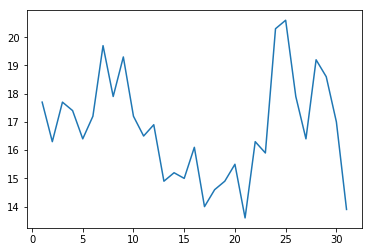

In [46]:
years = data['Year']
temp = data['Temp']


plot_data = data[(data['Year'] == 2012) & (data['Month'] == 7)]

plt.figure()
plt.plot(plot_data['Day'], plot_data['Temp'], '-')
plot_data

---
### Exercise 3

Make an array with the temperatures of the 5th day of every month in 2000.

In [47]:
# type your solution here

##### Solution

In [48]:
# %load solutions/session2/temperatures.py
day = 5
indices = np.where(data['Day'] == day) # find indices of 5th day for every month (over all data)
temp = data['Temp'][indices] # find corresponding temperatures
print(temp.size)
print(temp)


3084
[-7.2 -1.2 -1.  ...,  8.5  3.9 -4.2]


### Linear algebra

Handling *ndarrays* is really powerful. Of the many things one can do with NumPy's arrays is linear algebra:  

In [49]:
x = np.random.random(10)
print(x)

[ 0.67816144  0.53465645  0.31651639  0.16304009  0.18958904  0.97300605
  0.43522948  0.53539646  0.64535933  0.75152391]


We can find $L_\infty$-norm of this vector:

In [50]:
np.linalg.norm(x, np.inf) # maximum norm of a vector

0.9730060530812229

We can use this module to solve a linear system of equations

$$
\begin{align}
x + 2y &= 12, \\
3x + 4y &= 29
\end{align}
$$

In [51]:
A = np.array([[1, 2],[3, 4]])
b = np.array([12, 29])
print(A)
print(b)

[[1 2]
 [3 4]]
[12 29]


In [52]:
print(np.linalg.cond(A))
x = np.linalg.solve(A,b)
print(x)

14.9330343737
[ 5.   3.5]


To check that the solution is correct (that is, that $x$ that we computed satisfies $Ax = b$), we do matrix-vector multiplication. For that, function `dot` should be used:

In [53]:
np.dot(A, x)

array([ 12.,  29.])

and inner products of two vectors are computed with the same function:

In [54]:
x = np.array([1, 2])
y = np.array([3, 4])
np.dot(x, y)

11

We can also solve eigenvalue problems using function `linalg.eig`:

In [55]:
lamda, V = np.linalg.eig(A)
print(lamda)
print(V)

[-0.37228132  5.37228132]
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


---
### Exercise 4

Create a diagonal matrix using the *lamda* variable and then multiply from the left with V and from the right with the inverse of V (use *np.linalg.inv()*). What do you find?

In [56]:
# type your solution here

##### Solution

In [57]:
# %load solutions/session2/linear_algebra.py
print(np.dot(np.dot(V,np.diag(lamda)),np.linalg.inv(V)))


[[ 1.  2.]
 [ 3.  4.]]


<p></br></p>
<p></br></p>
<p></br></p>

## SciPy

`NumPy` is complemented by `SciPy`; a library that adds more MATLAB-like features to Python.

`SciPy` consists of several subpackages that can be used for linear algebra, image and signal processing, statistics, numerical integration of differential equations and more.

Here we'll study only a couple of subpackages to get the idea of how useful `SciPy` is.

### Getting started


It is customary to import subpackages of `SciPy` in the following manner:

### Integration

Subpackage `scipy.integrate` contains functions to compute quadratures and to solve ordinary differential equations.

The numerical evaluation of the definite integral of a function is called numerical quadrature, or simply quadature. 
SciPy provides a series of functions for different kind of quadrature, for example the quad, dblquad and tplquad for single, double and triple integrals, respectively.

Let's compute the Gauss integral numerically:

$$ \int_{-\infty}^{+\infty} \exp(-x^2) \, dx = \sqrt \pi $$

In [58]:
from scipy import integrate, special

In [59]:
xl = -1000  # the lower limit of x
xu = +1000  # the upper limit of x

def f(x):
    return np.exp(-x**2)

val, abserr = integrate.quad(f, xl, xu)

print("integral value =", val, ", absolute error =", abserr, 'analytic value = ', np.sqrt(np.pi))

integral value = 1.7724538509055159 , absolute error = 7.768296244985151e-09 analytic value =  1.77245385091


The Bessel functions of the first kind $J_n(x)$ are defined as the solutions to the Bessel differential equation

$$ x^2\frac{d^2y}{dx^2}+x\frac{dy}{dx}+(x^2-n^2)y=0$$

which are nonsingular at the origin. 

In [60]:
def integrand(x, n):
    """
    Bessel function of first kind and order n. 
    """
    return special.jv(n, x)

xl = 0  # the lower limit of x
xu = 10 # the upper limit of x

val, abserr = integrate.quad(integrand, xl, xu, args=(0,))

print(val, abserr)

1.0670113039567362 7.434789460651883e-14


We can pass extra arguments to integrand function, by using the `args` keyword argument.
For example we can use `args=(3,)` for the third order Bessel function.

### Example of integration of system of ordinary differential equations

We will have a look at the Lotka-Volterra model, also known as the predator-prey equations,
which is a pair of first order, non-linear, differential equations frequently used to describe
the dynamics of biological systems in which two species interact, one a predator and the other its prey.
The model was proposed independently by Alfred J. Lotka in 1925 and Vito Volterra in 1926,
and can be described by

$$
\begin{align}
\frac{du}{dt} &= \phantom{-}au - \phantom{d}buv, \\
\frac{dv}{dt} &= -cv + dbuv, \\
\end{align}
$$
where
*  $u(t)$: number of preys (for example, rabbits)

*  $v(t)$: number of predators (for example, foxes)

*  $a$, $b$, $c$, $d$ are constant parameters defining the behavior of the population:

  + $a$ is the natural growing rate of rabbits, when there's no fox

  + $b$ is the natural dying rate of rabbits, due to predation

  + $c$ is the natural dying rate of fox, when there's no rabbit

  + $d$ is the factor describing how many caught rabbits let create a new fox

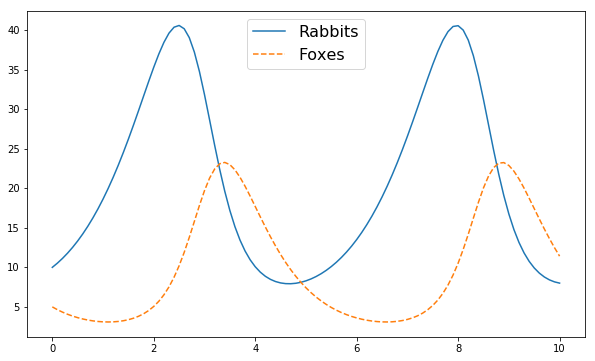

In [83]:
a = 1.0
b = 0.1
c = 1.5
d = 0.75

def dy_dt(t, y):
    """Compute right-hand side of Lotka--Volterra system."""
    u, v = y[0], y[1]
    return np.array([
         a*u -   b*u*v,
        -c*v + d*b*u*v
    ])

# Initial value.
y0 = [10, 5]
t0 = 0.0
dt = 0.1
tfinal = 10

# Two lists that will hold the solution.
times = np.linspace(0, tfinal, num=101)
u = [y0[0]]
v = [y0[1]]

s = integrate.ode(dy_dt)
s.set_integrator('dopri5')
s.set_initial_value(y0, t0)

for t in times[1:]:
    s.integrate(t)
    u.append(s.y[0])
    v.append(s.y[1])
    
plt.figure(figsize=(10,6))
plt.plot(times, u, '-', label='Rabbits')
plt.plot(times, v, '--', label='Foxes')
plt.legend(loc='best',fontsize=16);

### Interpolation

The `interpolate.interp1d` function accepts array of points $(X, Y)$ and returns a new function that can find interpolated values from this array.
You can use an options for interpoland kinds such as linear, quadratic and cubic spline interpolation.

In [84]:
from scipy import interpolate

In [85]:
x = np.linspace(0, 1, num=11)
y = np.sin(2 * np.pi * x)

f1 = interpolate.interp1d(x, y) # linear interpolation
f3 = interpolate.interp1d(x, y, kind='cubic')

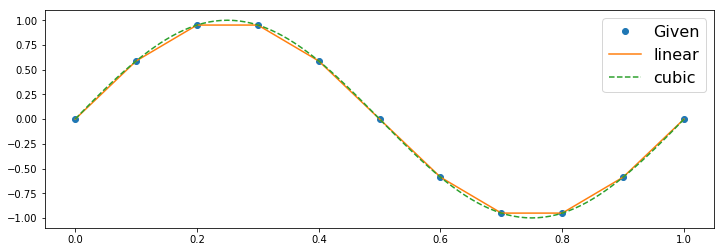

In [87]:
# new points where we want to evaluate the interpoland
xnew = np.linspace(0, 1, num=101)

plt.figure(figsize=(12,4))
plt.plot(x, y,'o', label='Given')
plt.plot(xnew, f1(xnew), '-', label='linear')
plt.plot(xnew, f3(xnew), '--', label='cubic')
plt.legend(loc='best',fontsize=16);

## Sparse matrices

Sparse matrices are often useful in numerical analysis dealing with large systems.
Whenever the problem involves vectors or matrices with mostly zero values then one should take advantage of the sparsity.
SciPy has an extensive library for sparse matrices, with basic linear algebra operations (such as equation solving, eigenvalue calculations, etc).

To create a sparse matrix we have to choose the format that will be stored in:

In [90]:
from scipy import sparse

In [91]:
# dense matrix
M = np.array([[10,0,0,0], [0,.3,0,0], [0,2,1.5,0], [-3,0,0,100]])
M

array([[  10. ,    0. ,    0. ,    0. ],
       [   0. ,    0.3,    0. ,    0. ],
       [   0. ,    2. ,    1.5,    0. ],
       [  -3. ,    0. ,    0. ,  100. ]])

In [92]:
# convert from dense to sparse
M_sparse = sparse.csr_matrix(M); # or csc_matrix(M)
M_sparse 

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

We can go back to the dense form:

In [93]:
print(M_sparse)
print(M_sparse.todense())

  (0, 0)	10.0
  (1, 1)	0.3
  (2, 1)	2.0
  (2, 2)	1.5
  (3, 0)	-3.0
  (3, 3)	100.0
[[  10.     0.     0.     0. ]
 [   0.     0.3    0.     0. ]
 [   0.     2.     1.5    0. ]
 [  -3.     0.     0.   100. ]]


The easiest way to create a sparse matrix is to use the `lil_matrix` function.
It creates an empty matrix and then we allocating non-zero entries by using matrix indexing.
This way we avoid creating large dense matrices.

In [94]:
A = sparse.lil_matrix((4,4)) # empty 4x4 sparse matrix
A[0,0] = 1
A[1,1] = 3
A[2,2] = A[2,1] = 1
A[3,3] = A[3,0] = 1
A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in LInked List format>

We can also change the format based on the sparsity:

In [95]:
A = sparse.csr_matrix(A); A # if the rows are sparse

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [96]:
A = sparse.csc_matrix(A); A # if the columns are sparse

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Column format>

---
### Exercise 6

Construct a $10000 \times 10000$ `lil_matrix` $A$ and add values to it by setting all rows and columns $2000$ to $3000$ into random values. Also set random diagonal entries (you can do this without a loop!). Then use the `spy` function from `matplotlib.pyplot` to "spy" the matrix.

Using a vector $b$ with $10000$ random values solve the system $A x = b$. 
To do so use the direcet solver `linsolve` from `scipy.sparse.linalg.dsolve`.
Change to different sparse formats (CSR and CSC) and measure the time needed to solve the system. You can use the `time` package.

In [74]:
# type your solution here

##### Solution

Populating the interactive namespace from numpy and matplotlib


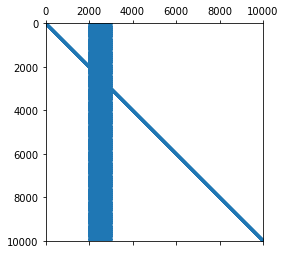

residual: 2.70191262463e-11
0.02067089080810547


In [75]:
# %load solutions/session2/sparse_matrices.py
"""
Construct a 1000x1000 lil_matrix and add some values to it, convert it
to CSC format and solve A x = b for x with a direct solver.
"""
%pylab inline --no-import-all
from matplotlib import pyplot as plt
import numpy as np
import scipy.sparse as sps
from scipy.sparse.linalg.dsolve import linsolve
import time

rand = np.random.rand

A = sps.lil_matrix((10000, 10000), dtype=np.float64)
A[0::100, 2000:3000] = rand(1000)
A.setdiag(rand(10000))

A = A.tocsc() # Compressed Sparse Column format

# Spy matrix
plt.spy(A, marker='.', markersize=2)
plt.show()

b = rand(10000) # random rhs

t1 = time.time() # initial time
x = linsolve.spsolve(A, b) # solve system
t2 = time.time() # final time
print('residual:', np.linalg.norm(A * x - b))
print(t2-t1)


## Fast Fourier Transform

When you need to study the spectrum of a signal (function of time), you can use Fourier Transform for this.
The implementation of the Fourier transform, known as Fast Fourier Transform, can be used with the help of subpackage `scipy.fftpack`.

Let's apply Fast Fourier Transform to the signal:

$$ y(t) = \sin 2\pi f t + \text{normal noise},$$

where $f = 4$.

Suppose, that the signal is sampled with sampling rate 50 times per unit time (time step is 0.02).
Hence, we can compute the spectrum with upper bound of frequency being 25.

In [97]:
from scipy import fftpack

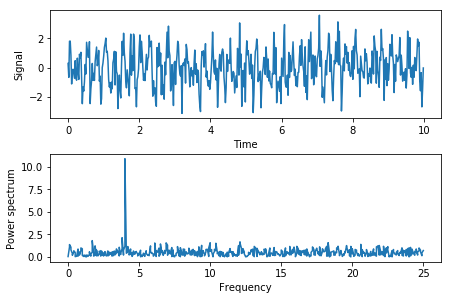

In [98]:
f0 = 4
timestep = 0.02
tfinal = 10.0

# Create the oscillator
time = np.arange(0, tfinal, timestep)
y = np.sin(2*np.pi*f0 * time)
y = y + np.random.normal(size=len(y))

# Use an FFT to calculate its spectrum
yhat = fftpack.rfft(y)

# Find the positive frequencies
frequency = fftpack.rfftfreq(y.size, d=timestep)
spectrum = 2*timestep*np.abs(yhat)

# Create a figure
fig, (ax1, ax2) = plt.subplots(2, 1)

# Create x-y plots of the amplitude and transform with labeled axes

ax1.set_xlabel('Time')
ax1.set_ylabel('Signal')
ax1.plot(time, y)

ax2.set_xlabel('Frequency')
ax2.set_ylabel('Power spectrum')
ax2.plot(frequency, spectrum, '-')

fig.tight_layout(pad=0.1)

## References:

#### NumPy:

- [NumPy tutorial](http://www.scipy.org/Tentative_NumPy_Tutorial) 
- [NumPy tutorial video](http://showmedo.com/videotutorials/series?name=i9KuJuNcG) 
- [NumPy: lock 'n load](http://mentat.za.net/numpy/intro/intro.html)
- [NumPy for Matlab users](http://www.scipy.org/NumPy_for_Matlab_Users)


#### SciPy
- [SciPy getting started](http://www.scipy.org/getting-started.html)
- [SciPy tutorial](https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/index.html)

#### More general

- [General Python tutorial](http://docs.python.org/tutorial/)
- [Dive Into Python](http://diveintopython.org/)
- [Hans Petter Langtangen book 1 (short)](https://link.springer.com/book/10.1007/978-3-319-32428-9)
- [Hans Petter Langtangen book 2 (long)](http://link.springer.com/book/10.1007/978-3-662-49887-3)

### Other packages
Besides NumPy and Scipy, there are many other useful Python packages for scientific computing. Here is a short list:  

- [matplotlib](http://www.matplotlib.org/) - plotting and visualization
- [sympy](http://sympy.org/) - symbolic computation
- [mpi4py](http://mpi4py.scipy.org/) - parallel computing
- [petsc4py](http://code.google.com/p/petsc4py/), [pytrilinos](http://trilinos.sandia.gov/packages/pytrilinos/) - Python bindings for the "big 2" parallel scientific libraries
- [pyCUDA](http://mathema.tician.de/software/pycuda), [pyOpenCL](http://mathema.tician.de/software/pyopencl) - GPGPU computing
- [FENiCS](http://fenicsproject.org/), [FiPy](http://www.ctcms.nist.gov/fipy/), [PyClaw](http://numerics.kaust.edu.sa/pyclaw/) - solve complicated PDEs with very sophisticated numerical methods
- [networkX](http://networkx.github.com/), [pygraphviz](http://networkx.lanl.gov/pygraphviz/) - graphs